In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

def calculate_z(W, X, b):
    return np.dot(W, X) + b

def sigmoid(z):
    return 1 / (1  + np.exp(-z))

def dJ_dWdB(X: np.ndarray, Y, W, b):
    m = Y.size
    sum_db = 0
    sum_dw = np.zeros(X.shape[1])
    for i in range(0, m):
        x = X[i]
        y = Y[i]
        z = calculate_z(W, x, b)
        f = sigmoid(z)
        tmp = (f - y)
        sum_db = sum_db + tmp
        sum_dw = sum_dw + tmp * x
    
    return sum_dw / m, sum_db / m

def run_descent(X, Y, W0, b0):
    W = W0
    b = b0
    alpha = 0.001
    steps = 1 * 10 ** 5

    for i in range(steps):
        dw, db = dJ_dWdB(X, Y, W, b)
        W = W - alpha * dw
        b = b - alpha * db

    return W, b



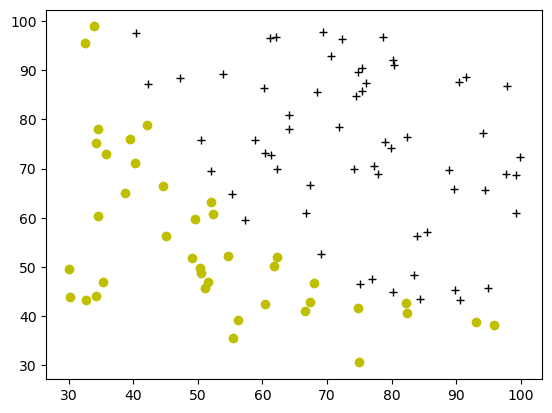

In [3]:

X, y = load_data("data/ex2data1.txt")

plot_data(X, y[:], pos_label="Admitted", neg_label="Not admitted")

[0.04180126 0.0345514 ] -4.349077199033892
100 100
[0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1.]
[0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0.]


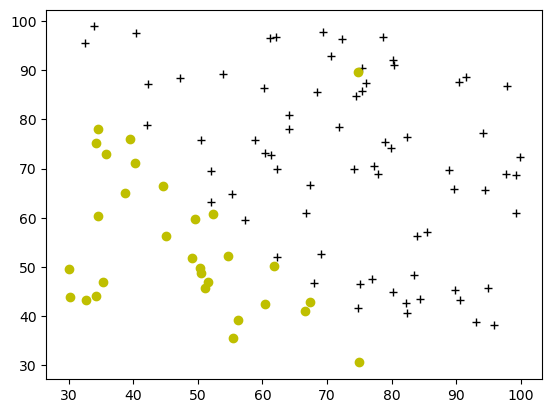

In [4]:
W, b = run_descent(X, y, [1, 1], 1)

print(W, b)

size = 100
predictions = np.zeros(X.shape[0])

print(predictions.size, X.shape[0])

for i in range(size - 1):
    z = calculate_z(W, X[i], b)
    sig = sigmoid(z)
    predictions[i] = 1 if sig > 0.5 else 0

print(y)
print(predictions)

plot_data(X, predictions[:], pos_label="Admitted", neg_label="Not admitted")